Fonte dos dados: [PRODES](http://www.obt.inpe.br/OBT/assuntos/programas/amazonia/prodes)

In [3]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt 

import seaborn as sns

import plotly.express as px

import geopandas as gpd

In [4]:
dados = pd.read_excel("../data/Desmatamento.xlsx")

dados.head(), dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Ano         37 non-null     int64
 1   AC          37 non-null     int64
 2   AM          37 non-null     int64
 3   AP          37 non-null     int64
 4   MA          37 non-null     int64
 5   MT          37 non-null     int64
 6   PA          37 non-null     int64
 7   RO          37 non-null     int64
 8   RR          37 non-null     int64
 9   TO          37 non-null     int64
 10  Area Total  37 non-null     int64
dtypes: int64(11)
memory usage: 3.3 KB


(    Ano   AC    AM   AP    MA    MT    PA    RO   RR    TO  Area Total
 0  1988  620  1510   60  2450  5140  6990  2340  290  1650       21050
 1  1989  540  1180  130  1420  5960  5750  1430  630   730       19759
 2  1990  550   520  250  1100  4020  4890  1670  150   580       13730
 3  1991  380   980  410   670  2840  3780  1110  420   440       11030
 4  1992  400   799   36  1135  4674  3787  2265  281   409       13786,
 None)

In [5]:
dados_long = pd.melt(
    dados,
    id_vars = "Ano",
    value_vars = [
    "AC", "AM", "AP", "MA", "MT", "PA", "RO", "RR", "TO", "Area Total"],
    var_name = "Estados",
    value_name = "Area" 
)

dados_long

,Ano,Estados,Area
0,1988,AC,620
1,1989,AC,540
2,1990,AC,550
3,1991,AC,380
4,1992,AC,400
...,...,...,...
365,2020,Area Total,10851
366,2021,Area Total,13038
367,2022,Area Total,11594
368,2023,Area Total,9064


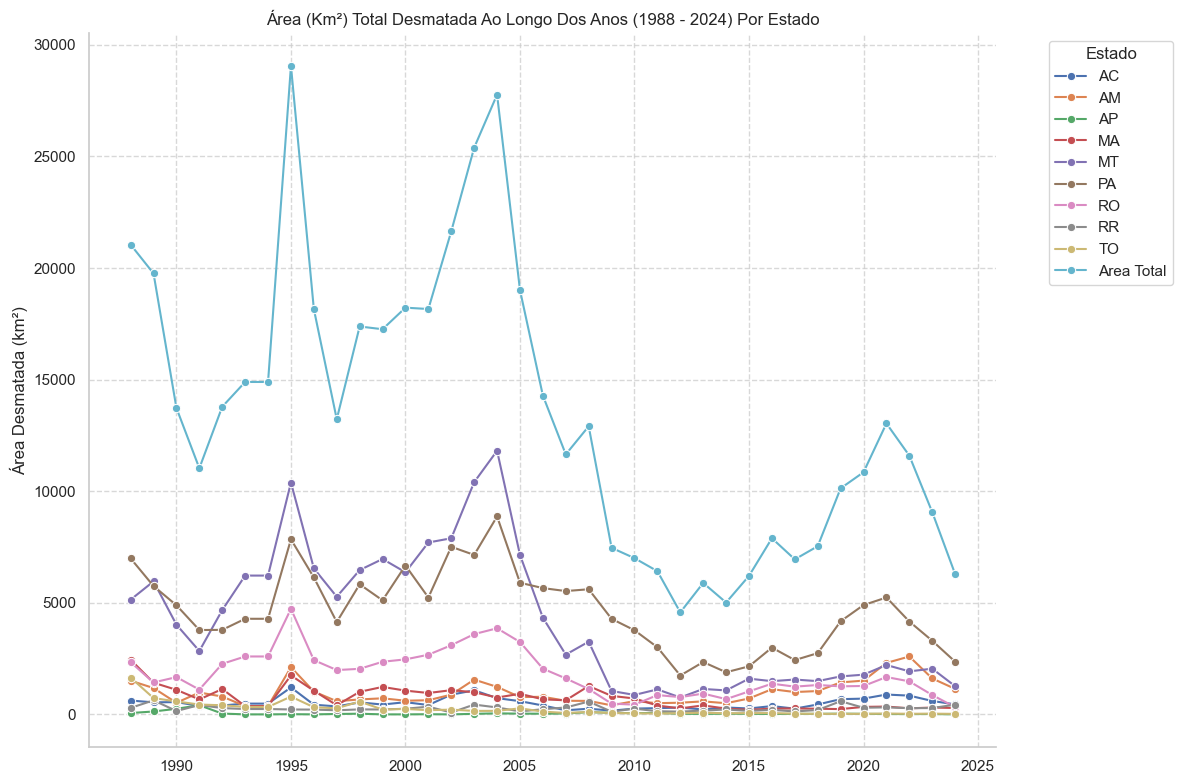

In [14]:
plt.figure(figsize = (12, 8))

sns.lineplot(
    data = dados_long,
    x = "Ano",
    y = "Area",
    hue = "Estados",
    marker = "o", 
)

plt.title("Área (Km²) Total Desmatada Ao Longo Dos Anos (1988 - 2024) Por Estado")

plt.xlabel("")

plt.ylabel("Área Desmatada (km²)")  

plt.legend(title = "Estado", bbox_to_anchor = (1.05, 1), loc = "upper left")

plt.grid(True, linestyle = "--", alpha = 0.75)

plt.tight_layout()

sns.despine()

plt.show()

In [7]:
estados_regioes = {
    'MT': 'Centro-Oeste', 'AC': 'Norte', 'AP': 'Norte',
    'AM': 'Norte', 'PA': 'Norte', 'RO': 'Norte', 
    'RR': 'Norte', 'TO': 'Norte', 'MA': 'Nordeste'
}

dados_estados = pd.melt(
        dados,
        id_vars = "Ano",
        value_vars = [
            "AC", "AM", "AP", "MA", "MT", "PA", "RO", "RR", "TO"],
        var_name = "Estados",
        value_name = "Area" 
)

dados_estados["Regiao"] = dados_estados["Estados"].map(estados_regioes)

dados_estados

,Ano,Estados,Area,Regiao
0,1988,AC,620,Norte
1,1989,AC,540,Norte
2,1990,AC,550,Norte
3,1991,AC,380,Norte
4,1992,AC,400,Norte
...,...,...,...,...
328,2020,TO,25,Norte
329,2021,TO,37,Norte
330,2022,TO,27,Norte
331,2023,TO,32,Norte


In [ ]:
dados_regiao_total = dados_estados.groupby("Regiao")["Area"].sum().sort_values(ascending = False)

dados_regiao_total

Regiao
Norte           314864
Centro-Oeste    155390
Nordeste         26967
Name: Area, dtype: int64

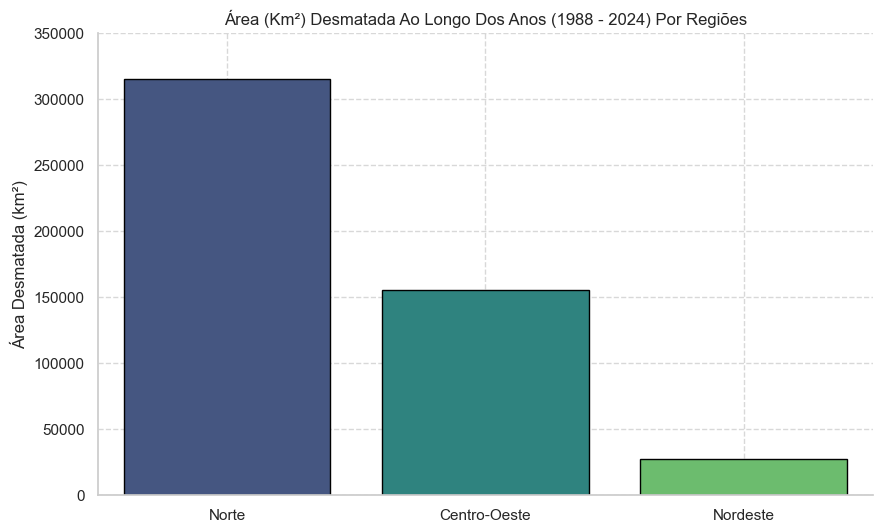

In [15]:
plt.figure(figsize = (10, 6))

sns.barplot(
    data = pd.DataFrame(dados_regiao_total),
    x = "Regiao",
    y = "Area",
    hue = "Regiao",
    palette = "viridis", 
    edgecolor = "Black", 
    legend = False
)

plt.title("Área (Km²) Desmatada Ao Longo Dos Anos (1988 - 2024) Por Regiões")

plt.xlabel("")

plt.ylabel("Área Desmatada (km²)")  

plt.grid(True, linestyle = "--", alpha = 0.75)

plt.yticks(range(0, 400000, 50000))

sns.despine()

plt.show()

In [ ]:
dados_estados_total = dados_estados.groupby("Estados")["Area"].sum().sort_values(ascending = False)

dados_estados_total

Estados
PA    172435
MT    155390
RO     67295
AM     36137
MA     26967
AC     18557
RR      9908
TO      8845
AP      1687
Name: Area, dtype: int64

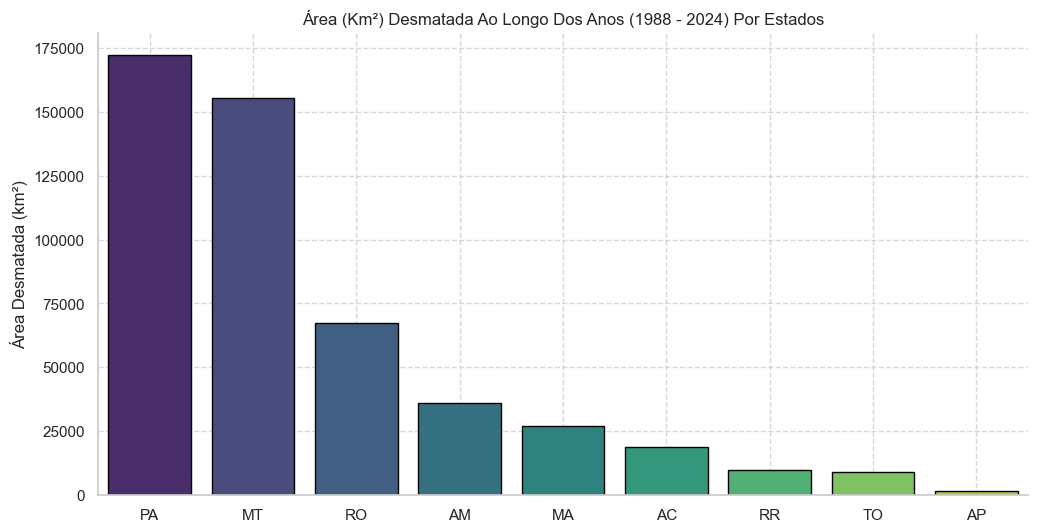

In [59]:
plt.figure(figsize = (12, 6))

sns.barplot(
    data = pd.DataFrame(dados_estados_total),
    x = "Estados",
    y = "Area",
    hue = "Estados",
    palette = "viridis", 
    edgecolor = "Black", 
    legend = False
)

plt.title("Área (Km²) Desmatada Ao Longo Dos Anos (1988 - 2024) Por Estados")

plt.xlabel("")

plt.ylabel("Área Desmatada (km²)")  

plt.grid(True, linestyle = "--", alpha = 0.75)

sns.despine()

plt.show()

In [46]:
mapa_br = gpd.read_file("../data/shape/BR_UF_2022.shp")

mapa_br.columns

Index(['CD_UF', 'NM_UF', 'SIGLA_UF', 'NM_REGIAO', 'AREA_KM2', 'geometry'], dtype='object')

In [48]:
dados_mapa = dados_estados.groupby("Estados")["Area"].sum().sort_values(ascending = False)

dados_mapa

Estados
PA    172435
MT    155390
RO     67295
AM     36137
MA     26967
AC     18557
RR      9908
TO      8845
AP      1687
Name: Area, dtype: int64

In [55]:
mapa_dados = mapa_br.merge(dados_mapa, 
                          left_on = "SIGLA_UF", 
                          right_on = "Estados")

mapa_dados

,CD_UF,NM_UF,SIGLA_UF,NM_REGIAO,AREA_KM2,geometry,Area
0,12,Acre,AC,Norte,164173.429,"POLYGON ((-68.79282 -10.99957, -68.79367 -10.9...",18557
1,13,Amazonas,AM,Norte,1559255.881,"POLYGON ((-56.76292 -3.23221, -56.76789 -3.242...",36137
2,15,Pará,PA,Norte,1245870.704,"MULTIPOLYGON (((-48.97548 -0.19834, -48.97487 ...",172435
3,16,Amapá,AP,Norte,142470.762,"MULTIPOLYGON (((-51.04561 -0.05088, -51.05422 ...",1687
4,17,Tocantins,TO,Norte,277423.627,"POLYGON ((-48.2483 -13.19239, -48.24844 -13.19...",8845
5,21,Maranhão,MA,Nordeste\n,329651.496,"MULTIPOLYGON (((-44.5868 -2.23341, -44.58696 -...",26967
6,51,Mato Grosso,MT,Centro-oeste\n,903208.361,"POLYGON ((-56.0716 -17.17062, -56.07246 -17.17...",155390
7,11,Rondônia,RO,Norte,237754.172,"POLYGON ((-62.60021 -13.01675, -62.59999 -13.0...",67295
8,14,Roraima,RR,Norte,223644.530,"POLYGON ((-60.12972 4.50843, -60.1296 4.50826,...",9908


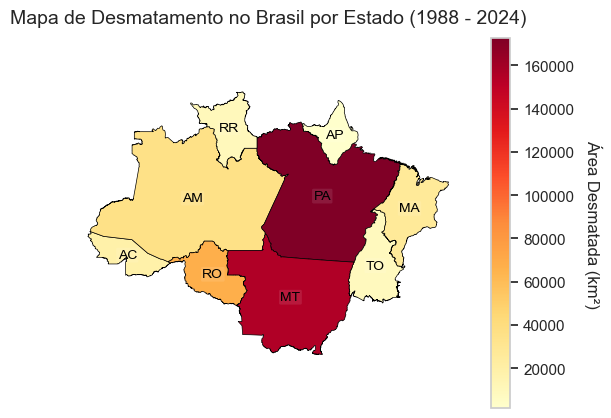

In [ ]:
ax = mapa_dados.plot(column = "Area", 
                    cmap = "YlOrRd", 
                    legend = True,
                    edgecolor = "black",
                    linewidth = 0.5)

for idx, row in mapa_dados.iterrows():
    centroid = row.geometry.centroid
    plt.text(centroid.x, centroid.y, 
             s = row["SIGLA_UF"],  # Alterar "sigla" se a coluna tiver outro nome
             ha = "center", 
             va = "center",
             fontsize = 10,
             color = "black",
             bbox = dict(facecolor = "white", alpha = 0.1, edgecolor = "none", boxstyle = "round", pad = 0.1))

plt.title("Mapa de Desmatamento no Brasil por Estado (1988 - 2024)", fontsize = 14, pad = 40)

plt.axis("off")

cbar = ax.get_figure().get_axes()[1]

cbar.set_ylabel("Área Desmatada (km²)", rotation = 270, labelpad = 20)

plt.show()